In this notebook, we learn how to use scikit-learn for Polynomial regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate our model using test set, and finally use model to predict unknown value.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("FuelConsumption.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","FUELCONSUMPTION_HWY","CO2EMISSIONS"]]
cdf.tail(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY,CO2EMISSIONS
1062,3.0,6,11.8,9.8,271
1063,3.2,6,11.5,9.5,264
1064,3.0,6,11.8,9.8,271
1065,3.2,6,11.3,9.3,260
1066,3.2,6,12.8,10.2,294


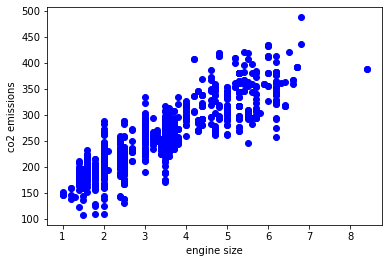

In [14]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")
plt.xlabel("engine size")
plt.ylabel("co2 emissions")
plt.show()

CREATE A TRAIN AND TEST SPLIT DATASET FOR BETTER OUT OF SAMPLING ACCURACY.

In [15]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

Polynomial regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

𝑦=𝑏+𝑡ℎ𝑒𝑡𝑎1𝑥+𝑡ℎ𝑒𝑡𝑎2𝑥2 
Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1,  𝑥 , and  𝑥2 .

PloynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [16]:
from sklearn.preprocessing  import PolynomialFeatures
from sklearn import linear_model
x_train=np.asanyarray(train[['ENGINESIZE']])
y_train=np.asanyarray(train[['CO2EMISSIONS']])

x_test=np.asanyarray(test[['ENGINESIZE']])
y_test=np.asanyarray(test[['CO2EMISSIONS']])

pr=PolynomialFeatures(degree=2)
x_poly_train=pr.fit_transform(x_train)
x_poly_train



array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [17]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(x_poly_train, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.38815581 -1.29964632]]
Intercept:  [107.01974694]


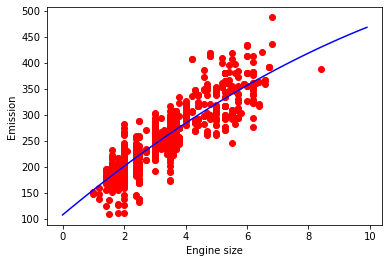

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-b' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

EVALUATION

In [19]:
from sklearn.metrics import r2_score
x_poly_test=pr.fit_transform(x_test)
y_test_=clf.predict(x_poly_test)

print("mean absolute error :"%np.mean(np.absolute(y_test_ - y_test)))
print("mean squard error :%0.2f"%np.mean((y_test_ - y_test)**2))
print("r2 error %.2f "%r2_score(y_test_,y_test))
      

mean absolute error :
mean squard error :942.23
r2 error 0.73 
